<a href="https://colab.research.google.com/github/YusunPark/DeepLearning/blob/main/3_2%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀
128p

## k-최근접 이웃의 한계

k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균합니다. 

따라서 새로운 샘플이 훈련 세트의 범위를 벗어나면 영뚱한 값을 예측할 수 있습니다. 
예를들어 길이가 100cm 인 농어도 50cm 와 같이 1033g으로 예측한다.

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 / 테스트 세트 나눔
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

# 훈련 / 테스트 세트를 2차원 배열로 바꿈
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
# 위의 모델을 가지고 길이가 50cm 인 농어의 무게를 예측 
# -> 하지만 실제 농어는 1kg보다 더 나간다.
print(knr.predict([[50]]))

[1033.33333333]


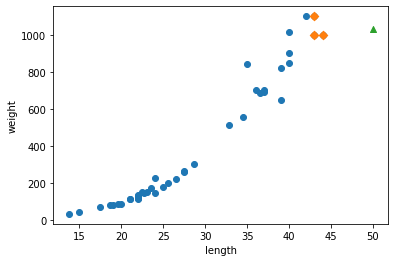

In [ ]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# k-최근접 이웃 알고리즘은 최근방 샘플들의 무게평균으로 예측한다.

print(np.mean(train_target[indexes]))

1033.3333333333333


In [ ]:
print(knr.predict([[50]]))
print(knr.predict([[100]]))

[1033.33333333]
[1033.33333333]


**머신러닝 모델은 주기적으로 훈련해주어야 한다.**

시간과 환경이 변화하면서 데이터도 바뀌기 때문에 주기적으로 새로운 훈련 데이터로 모델을 다시 훈련해야 합니다.<br>
 
예를 들어 배달 음식이 도착하는 시간을 예측하는 모델은 배달원이 바뀌거나 도로 환경이 변할 수 있기 때문에 새로운 데이터를 사용해 반복적으로 훈련해야 합니다. 

## 선형 회귀
133p

널리 사용되는 대표적인 회귀 알고리즘.

간단하고, 성능이 뛰어나다.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(train_input, train_target)

# 50cm 농어를 예측
print(lr.predict([[50]]))

[1241.83860323]


In [ ]:
# LinearRegression 에서 찾은 a와 b (모델 파라미터)
# coef_ : 머신러닝에서 기울기 = 계수(coefficient) or 가중치(weight)

print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


선형회귀는 직선을 그려서 예측하고 싶은 x값에 해당하는 y값을 반환

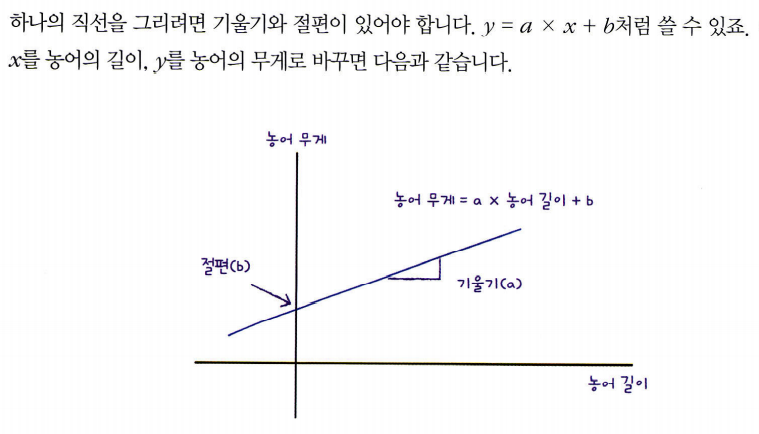

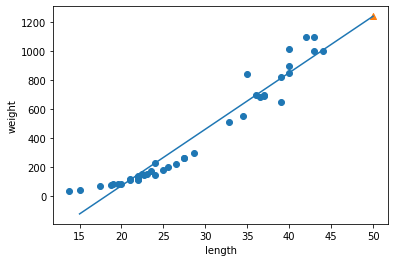

In [ ]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976039
0.8247503123313558


이 모델이 훈련 세트에 과대적합되었다고 말할 수 있는가? 
- No
- 왜냐하면 훈련세트의 점수도 높지 않다 -> 전체적으로 과소적합되었다.
- 그리고 직선회귀의 문제점이 농어의 무게가 0g 이하도 예측된다.
  - 따라서 다항 회귀가 필요함!
  

## 다항 회귀
137p

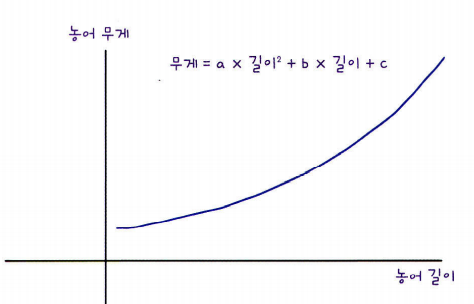

In [ ]:
# 다항회귀를 위해서 train, test에서 길이에 제곱을 취해준다.

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
# 2차 방정식 그래프를 찾기 위해 제곱항을 추가했지만
# 타깃값은 그대로 사용한다는 점에 주의
# 선형으로 예측한 값 [1241.83860323]보다 높게 나옴.

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [ ]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


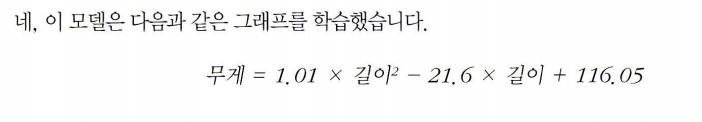

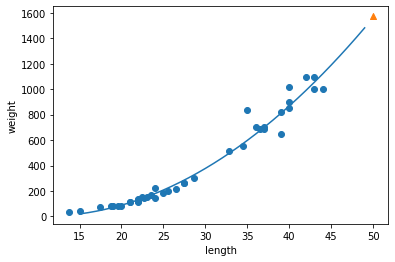

In [ ]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


앞의 단순 선형 회귀보다 더 나은 그래프가 그려졌다.
- R^2 점수 평가시 train 0.970 test0.977 
- 여전히 테스트 세트의 점수가 조금 더 높다.-> 과소적합